In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr as pearr

tissue 1 - data length : (491,)
Variance  /  mean  :  11.9541  /  0.0000
Max / Min value : 20.7391 / -0.9900



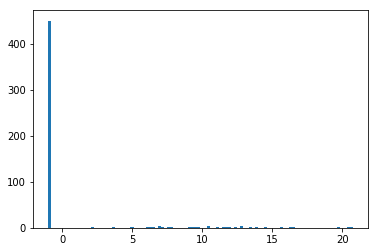

In [2]:
gene = 3
trial_num = 1
model_num = 1

for g in range(gene-1, gene):
    gene_num = g+1
    
    for t in range(1):
        tissue_num = 1
        GX_observed = np.array([])

        for k in range(5):
            k_num = k+1
            GX_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teGX_k%d.npy'\
                            %(trial_num, gene_num, model_num, tissue_num, k_num))
            GX_observed = np.append(GX_observed, np.reshape(GX_te, -1))
        
        
        GX_var = np.var(GX_observed)
        GX_mean = np.mean(GX_observed)
        print('tissue %d - data length :'%tissue_num, np.shape(GX_observed))
        print('Variance  /  mean  :  %.4f  /  %.4f'%(GX_var, GX_mean))
        print('Max / Min value : %.4f / %.4f\n'%(np.max(GX_observed), np.min(GX_observed)))
        plt.hist(GX_observed, bins=100)
        plt.show()

0 (491,) (491,)
0.2700847999296238


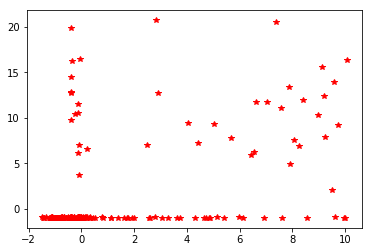

1 (491,) (491,)
0.3267843143213115


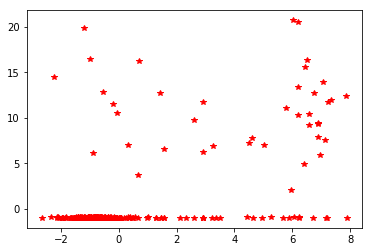

2 (491,) (491,)
0.2664188755246342


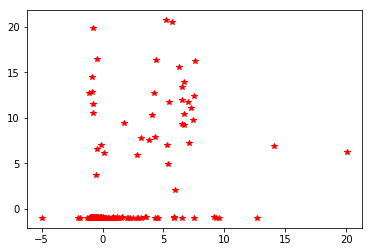

In [6]:
gene_num = 3
for m in range(3):
    model_num = m+1
    tissue_num = 1

    GX_observed = np.array([])
    GX_predicted = np.array([])

    for k in range(5):
        k_num = k+1

        try:
            SNP2_tr = np.load('npy/trial%d/gene%d/model%d/%dtissue_trSNP2_k%d.npy'\
                              %(trial_num, gene_num, model_num, tissue_num, k_num))
            SNP2_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teSNP2_k%d.npy'\
                              %(trial_num, gene_num, model_num, tissue_num, k_num))
        except FileNotFoundError:
#                     print('last saved snp2 loaded.')
            SNP2_tr = np.load('npy/trial%d/gene%d/model%d/%dtissue_trSNP2_k%d_last.npy'\
                              %(trial_num, gene_num, model_num, tissue_num, k_num))
            SNP2_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teSNP2_k%d_last.npy'\
                              %(trial_num, gene_num, model_num, tissue_num, k_num))

        GX_tr = np.load('npy/trial%d/gene%d/model%d/%dtissue_trGX_k%d.npy'\
                        %(trial_num, gene_num, model_num, tissue_num, k_num))    
        GX_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teGX_k%d.npy'\
                        %(trial_num, gene_num, model_num, tissue_num, k_num))

        GX_observed = np.append(GX_observed, np.reshape(GX_te, -1))
        GX_predicted = np.append(GX_predicted, np.reshape(SNP2_te, -1))
        
    print(m, np.shape(GX_observed), np.shape(GX_predicted))
    R_, p = pearr(GX_observed, GX_predicted)
    R2 = R_**2
    print(R2)
    
    plt.plot(GX_predicted, GX_observed, 'r*')
    plt.show()
